<a href="https://colab.research.google.com/github/Tasnim-Jahan/Course_Machine_Learning/blob/main/3.1%20DigitsDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read the Digit data

In [ ]:
import pandas as pn
import numpy as np

digits_X= pn.read_csv("https://raw.githubusercontent.com/swakkhar/MachineLearning/master/Codes/X.csv",header=None)
digits_y= pn.read_csv("https://raw.githubusercontent.com/swakkhar/MachineLearning/master/Codes/Y.csv",header=None)
digits_X=np.asarray(digits_X)
digits_y=np.asarray(digits_y)


In [ ]:
digits_X.shape

(5000, 400)

In [ ]:
digits_y=np.reshape(digits_y,(digits_y.shape[0],))
digits_y.shape

(5000,)

2101


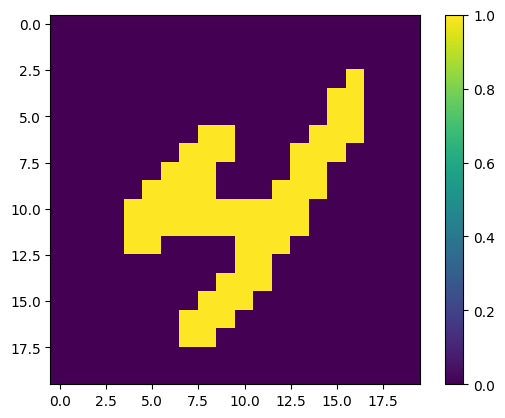

4


In [ ]:
import matplotlib.pyplot as plt
def digitShow(x):
  plt.imshow(x);
  plt.colorbar()
  plt.show()

roW_indeX=np.random.randint(0,5000)
print(roW_indeX)
digitShow((np.reshape(digits_X[roW_indeX,:],(20,20))).T)
print(digits_y[roW_indeX])

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_X, digits_y, test_size=0.10, random_state=0)
t = tree.DecisionTreeClassifier()
y_pred = t.fit(X_train, y_train).predict(X_test)
#print(y_pred)
#print(y_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 500 points : 106


In [ ]:
e = []
l =[]
for i in range(1,120):
  t = tree.DecisionTreeClassifier(max_depth=i)
  t = t.fit(X_train, y_train)
  y_tpred = t.predict(X_test)
  y_lpred = t.predict(X_train)
  terror = (y_train != y_lpred).sum()
  error = (y_test != y_tpred).sum()
  print("Test Error %d by max depth %d" % (error, i) )
  print("Train Error %d by max depth %d" % (terror, i) )
  l.append(terror)
  e.append(error)





Test Error 398 by max depth 1
Train Error 3647 by max depth 1
Test Error 354 by max depth 2
Train Error 3081 by max depth 2
Test Error 250 by max depth 3
Train Error 2340 by max depth 3
Test Error 194 by max depth 4
Train Error 1774 by max depth 4
Test Error 176 by max depth 5
Train Error 1456 by max depth 5
Test Error 137 by max depth 6
Train Error 1134 by max depth 6
Test Error 121 by max depth 7
Train Error 817 by max depth 7
Test Error 115 by max depth 8
Train Error 561 by max depth 8
Test Error 104 by max depth 9
Train Error 359 by max depth 9
Test Error 107 by max depth 10
Train Error 209 by max depth 10
Test Error 101 by max depth 11
Train Error 126 by max depth 11
Test Error 102 by max depth 12
Train Error 77 by max depth 12
Test Error 98 by max depth 13
Train Error 40 by max depth 13
Test Error 106 by max depth 14
Train Error 23 by max depth 14
Test Error 95 by max depth 15
Train Error 18 by max depth 15
Test Error 101 by max depth 16
Train Error 15 by max depth 16
Test Error 

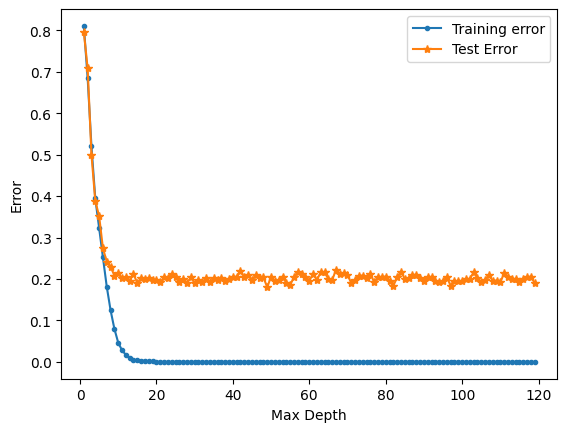

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

plt.plot(range(1,120),[i/4500 for i in l],marker=".")
plt.plot(range(1,120),[i/500 for i in e],marker="*")
plt.xlabel("Max Depth")
plt.ylabel("Error")
plt.legend(["Training error","Test Error"])

# Visualization of trees

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

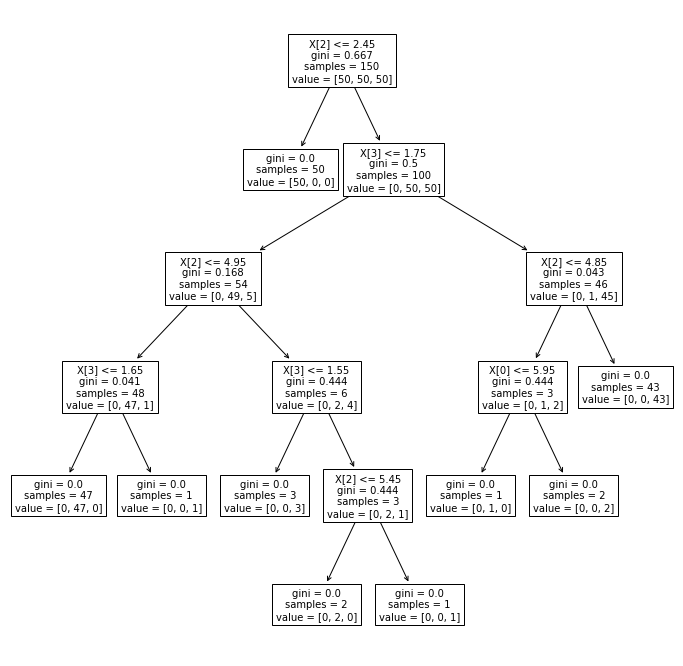

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X, y)
import matplotlib.pyplot as plt
plt.subplots(figsize=(12, 12))
tree.plot_tree(clf,fontsize=10)